In [ ]:
### Combination of Python and R Data Analysis

In [ ]:
!pip install pyreadstat
!pip install pandas
!pip install requests
!pip install seaborn
!pip install scipy
!pip install matplotlib

In [ ]:
import numpy as np
from scipy.stats import chi2_contingency, f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pyreadstat
import os

In [ ]:
#OPTION 1
# Download all XPT Files
# Set output folder
folder = "/content/raw"
os.makedirs(folder, exist_ok=True)

# NHANES file URLs
nhanes_urls = {
    "rawdemo": "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/DEMO_L.xpt",
    "rawbp": "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/BPXO_L.xpt",
    "rawvitd": "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/VID_L.xpt",
    "rawhepb": "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/HEPB_S_L.xpt",
    "rawkidney": "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/KIQ_U_L.xpt",
    "rawminbehavior": "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/PAQ_L.xpt",
    "rawweight": "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/WHQ_L.xpt",
    "rawmental": "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/DPQ_L.xpt"
}

# Download each file using its original filename
for url in nhanes_urls.values():
    filename = os.path.basename(url)  # Extract filename from URL
    filepath = os.path.join(folder, filename)
    print(f"Downloading {filename}...")
    response = requests.get(url)
    if response.status_code == 200:
        with open(filepath, "wb") as f:
            f.write(response.content)
        print(f"Saved to {filepath}")
    else:
        print(f"Failed to download {filename}: HTTP {response.status_code}")


Saved to /content/raw/DEMO_L.xpt
Saved to /content/raw/BPXO_L.xpt
Saved to /content/raw/VID_L.xpt
Saved to /content/raw/HEPB_S_L.xpt
Saved to /content/raw/KIQ_U_L.xpt
Saved to /content/raw/PAQ_L.xpt
Saved to /content/raw/WHQ_L.xpt
Saved to /content/raw/DPQ_L.xpt


In [ ]:
#  If you have the XPT files already downloaded in the /content/raw/ folder
#  checking for xpt file that are non readable with pyreadtat because of formatting issue
folder = "/content/raw/"
for file in os.listdir(folder):
    if file.endswith(".xpt"):
        path = os.path.join(folder, file)
        try:
            df, meta = pyreadstat.read_xport(path)
            print(f"✅ Loaded: {file}")
        except Exception as e:
            print(f"❌ Failed: {file} — {e}")

❌ Failed: DEMO_L.xpt — 'utf-8' codec can't decode byte 0x92 in position 13: invalid start byte
✅ Loaded: VID_L.xpt
✅ Loaded: KIQ_U_L.xpt
✅ Loaded: WHQ_L.xpt
✅ Loaded: PAQ_L.xpt
✅ Loaded: BPXO_L.xpt
✅ Loaded: DPQ_L.xpt
✅ Loaded: HEPB_S_L.xpt


In [ ]:
# attempted to use pyreadstat to read xpt file
# the  file has invalid type of formatting
# tried multiple scripts but gives me more issues.
df, meta = pyreadstat.read_xport("/content/raw/DEMO_L.xpt")
print(df.head())

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 13: invalid start byte

In [ ]:
# gave up on converting to change formatting issue in the xpt file and tried to use R instead

In [ ]:
# Using R to convert xpt to csv
# Change Runtime Type to R, prior to doing the script below
# Installing haven (only needed once)
install.packages("haven")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Converting single .xpt file to .csv
library(haven)
data <- read_xpt("/content/raw/DPQ_L.xpt")
write.csv(data, "/content/raw/DPQ_L.csv", row.names = FALSE)

In [ ]:
# Converting all .xpt files to .csv
# Load the library
library(haven)

# Set folder path
folder <- "/content/raw"

# List all .xpt files
xpt_files <- list.files(folder, pattern = "\\.xpt$", full.names = TRUE)

# Loop through and convert each to .csv
for (xpt_file in xpt_files) {
  # Read .xpt file
  data <- read_xpt(xpt_file)

  # Create .csv filename
  csv_file <- sub("\\.xpt$", ".csv", xpt_file)

  # Write to CSV
  write.csv(data, csv_file, row.names = FALSE)

  cat("✅ Converted:", xpt_file, "→", csv_file, "\n")
}

✅ Converted: /content/raw/BPXO_L.xpt → /content/raw/BPXO_L.csv 
✅ Converted: /content/raw/DEMO_L.xpt → /content/raw/DEMO_L.csv 
✅ Converted: /content/raw/DPQ_L.xpt → /content/raw/DPQ_L.csv 
✅ Converted: /content/raw/HEPB_S_L.xpt → /content/raw/HEPB_S_L.csv 
✅ Converted: /content/raw/KIQ_U_L.xpt → /content/raw/KIQ_U_L.csv 
✅ Converted: /content/raw/PAQ_L.xpt → /content/raw/PAQ_L.csv 
✅ Converted: /content/raw/VID_L.xpt → /content/raw/VID_L.csv 
✅ Converted: /content/raw/WHQ_L.xpt → /content/raw/WHQ_L.csv 


In [ ]:
# OPTION 2
# If you are going to use the file directly from the website
# Ursing R directly converting XPT files from the weblink directly to CSV

# Install and load required package
install.packages("haven")
library(haven)

# Set output folder
folder <- "/content/raw"
dir.create(folder, showWarnings = FALSE)

# NHANES file URLs with named entries
nhanes_urls <- list(
  rawdemo = "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/DEMO_L.xpt",
  rawbp = "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/BPXO_L.xpt",
  rawvitd = "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/VID_L.xpt",
  rawhepb = "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/HEPB_S_L.xpt",
  rawkidney = "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/KIQ_U_L.xpt",
  rawminbehavior = "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/PAQ_L.xpt",
  rawweight = "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/WHQ_L.xpt",
  rawmental = "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/DPQ_L.xpt"
)

# Loop through each file, read and save as CSV using original filename
for (url in nhanes_urls) {
  data <- read_xpt(url)
  filename <- basename(url)                      # Extract filename from URL
  csv_name <- sub("\\.xpt$", ".csv", filename)   # Replace .xpt with .csv
  write.csv(data, file = file.path(folder, csv_name), row.names = FALSE)
}


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Change Runtime Type back to Python prior to scripts below
# Mapping urls
demo = pd.read_csv("/content/raw/DEMO_L.csv")
bp = pd.read_csv("/content/raw/BPXO_L.csv")
vitd = pd.read_csv("/content/raw/VID_L.csv")
hepb = pd.read_csv("/content/raw/HEPB_S_L.csv")
kidney = pd.read_csv("/content/raw/KIQ_U_L.csv")
minbehavior = pd.read_csv("/content/raw/PAQ_L.csv")
weight = pd.read_csv("/content/raw/WHQ_L.csv")
mental = pd.read_csv("/content/raw/DPQ_L.csv")

In [ ]:
## Analysis 1: Chi-square test between marital status and education level
# Step 1: Select and clean relevant columns
Analysis1 = (
    demo[['DMDMARTZ', 'DMDEDUC2']]
    .query("DMDMARTZ.notna() and DMDEDUC2.notna()")
    .query("DMDMARTZ not in [77, 99] and DMDEDUC2 not in [7, 9]")
)

# Step 2: Recode categories
marital_map = {1: 'Married', 2: 'Widowed/Divorced/Separated', 3: 'Single'}
Analysis1['MaritalStatus'] = Analysis1['DMDMARTZ'].map(marital_map)

Analysis1['EducLevel'] = Analysis1['DMDEDUC2'].apply(
    lambda x: 'Bachelor or Higher' if x == 5 else 'Less than Bachelor'
)

# Step 3: Drop rows with missing recodes
filtered = Analysis1[['MaritalStatus', 'EducLevel']].dropna()

# Step 4: Contingency table and chi-square test
contingency_table = pd.crosstab(filtered['MaritalStatus'], filtered['EducLevel'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 5: Output results
print("Contingency Table:\n", contingency_table)
print(f"\nChi-square Statistic: {chi2:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")

# Interpretation
if p < 0.05:
    print("\n✅ Statistically significant association between marital status and education level.")
else:
    print("\n❌ No statistically significant association found.")

Contingency Table:
 EducLevel                   Bachelor or Higher  Less than Bachelor
MaritalStatus                                                     
Married                                   1631                2503
Single                                     517                1106
Widowed/Divorced/Separated                 473                1542

Chi-square Statistic: 157.97
Degrees of Freedom: 2
P-value: 0.0000

✅ Statistically significant association between marital status and education level.


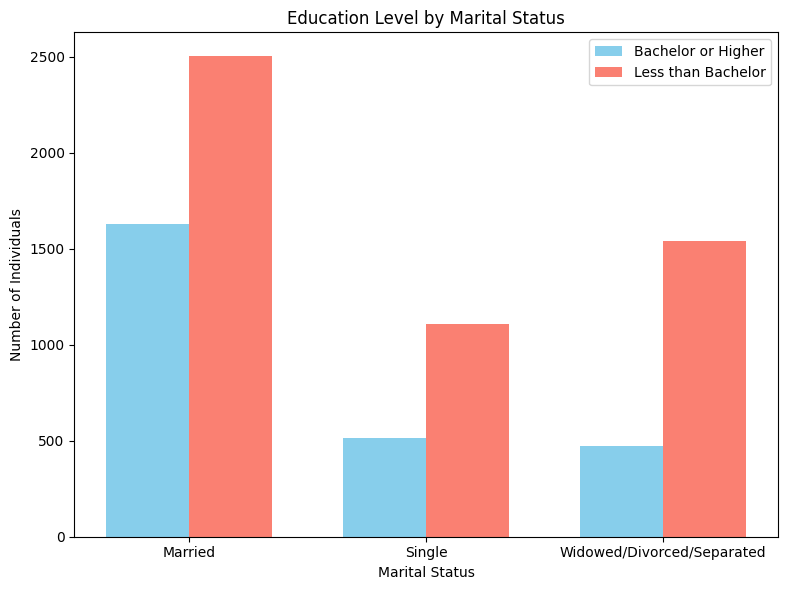

In [ ]:
# Step 6: Visualization (replace with actual counts if needed)
categories = contingency_table.index.tolist()
bachelor_counts = contingency_table['Bachelor or Higher'].tolist()
less_bachelor_counts = contingency_table['Less than Bachelor'].tolist()

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x - width/2, bachelor_counts, width, label='Bachelor or Higher', color='skyblue')
ax.bar(x + width/2, less_bachelor_counts, width, label='Less than Bachelor', color='salmon')

ax.set_xlabel('Marital Status')
ax.set_ylabel('Number of Individuals')
ax.set_title('Education Level by Marital Status')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
## Analysis 2: One-Way ANOVA (Analysis of Variance) between marital status and sedientary behavior time (PAD680)

# Step 1: Select and clean relevant columns
# Merge and clean
Analysis2 = pd.merge(
    demo[['SEQN', 'DMDMARTZ']],
    minbehavior[['SEQN', 'PAD680']],
    on='SEQN',
    how='inner'
)

filtered = (
    Analysis2[['DMDMARTZ', 'PAD680']]
    .query("DMDMARTZ.notna() and PAD680.notna()")
    .query("DMDMARTZ not in [77, 99] and PAD680 not in [7777, 9999]")
)
# Step2 Recode marital status
marital_map = {
    1: 'Married',
    2: 'Widowed/Divorced/Separated',
    3: 'Single'
}
filtered['MaritalStatus'] = filtered['DMDMARTZ'].map(marital_map)

# Step3 Create groups
groups = {
    status: filtered.loc[filtered['MaritalStatus'] == status, 'PAD680']
    for status in ['Married', 'Widowed/Divorced/Separated', 'Single']
}

# Step4 Run one-way ANOVA
f_stat, p_value = f_oneway(*groups.values())

# Step5 Output results
for status, group in groups.items():
    print(f"Mean PAD680 ({status}): {group.mean():.2f} minutes")

print(f"\nF-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("\n✅ Statistically significant difference in mean sedentary behavior time across marital status groups.")
else:
    print("\n❌ No statistically significant difference found.")

Mean PAD680 (Married): 353.29 minutes
Mean PAD680 (Widowed/Divorced/Separated): 363.46 minutes
Mean PAD680 (Single): 382.43 minutes

F-statistic: 11.09
P-value: 0.0000

✅ Statistically significant difference in mean sedentary behavior time across marital status groups.


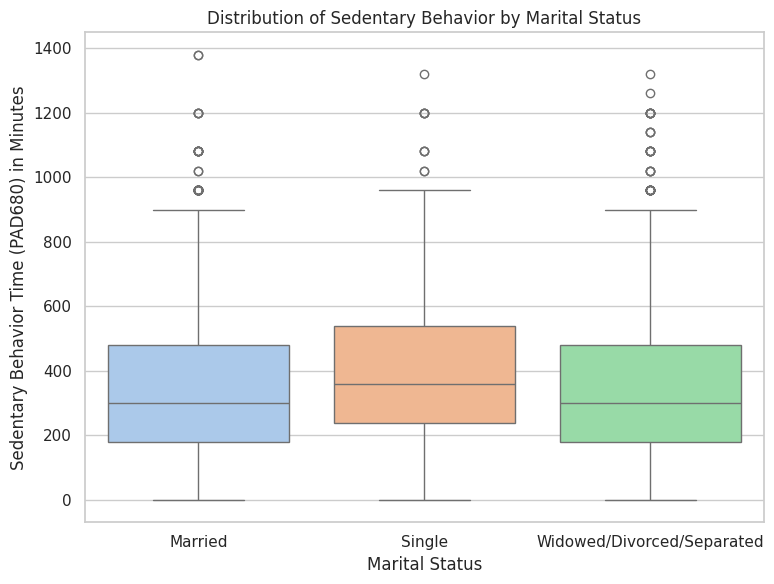

In [ ]:
# Visualization
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.boxplot(data=filtered, x='MaritalStatus', y='PAD680', hue='MaritalStatus', palette='pastel', dodge=False)
plt.legend([], [], frameon=False)  # Hide legend

plt.xlabel('Marital Status')
plt.ylabel('Sedentary Behavior Time (PAD680) in Minutes')
plt.title('Distribution of Sedentary Behavior by Marital Status')
plt.tight_layout()
plt.show()


In [ ]:
## Analysis 3: One-way ANOVA for systolic blood pressure (BPXOSY3) by marital status and age correlation
# Step 1: Load and merge relevant columns
Analysis3 = pd.merge(
    demo[['SEQN', 'RIDAGEYR', 'DMDMARTZ']],
    bp[['SEQN', 'BPXOSY3']],
    on='SEQN',
    how='inner'
)

# Step 2: Clean data
filtered = (
    Analysis3[['RIDAGEYR', 'DMDMARTZ', 'BPXOSY3']]
    .query("RIDAGEYR.notna() and DMDMARTZ.notna() and BPXOSY3.notna()")
    .query("DMDMARTZ not in [77, 99]")
)

# Step 3: Recode marital status
marital_map = {
    1: 'Married',
    2: 'Widowed/Divorced/Separated',
    3: 'Single'
}
filtered['MaritalStatus'] = filtered['DMDMARTZ'].map(marital_map)

# Step 4: Recode age group
filtered['AgeGroup'] = filtered['RIDAGEYR'].apply(lambda x: '80 and over' if x >= 80 else '0–79')

# Step 5: Create groups by marital status
groups = {
    status: filtered.loc[filtered['MaritalStatus'] == status, 'BPXOSY3']
    for status in ['Married', 'Widowed/Divorced/Separated', 'Single']
}

# Step 6: Run one-way ANOVA
f_stat, p_value = f_oneway(*groups.values())

# Step 7: Output results
for status, group in groups.items():
    print(f"Mean BPXOSY3 ({status}): {group.mean():.2f} mmHg")

print(f"\nF-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("\n✅ Statistically significant difference in systolic blood pressure across marital status groups.")
else:
    print("\n❌ No statistically significant difference found.")

Mean BPXOSY3 (Married): 122.61 mmHg
Mean BPXOSY3 (Widowed/Divorced/Separated): 126.14 mmHg
Mean BPXOSY3 (Single): 118.85 mmHg

F-statistic: 52.74
P-value: 0.0000

✅ Statistically significant difference in systolic blood pressure across marital status groups.


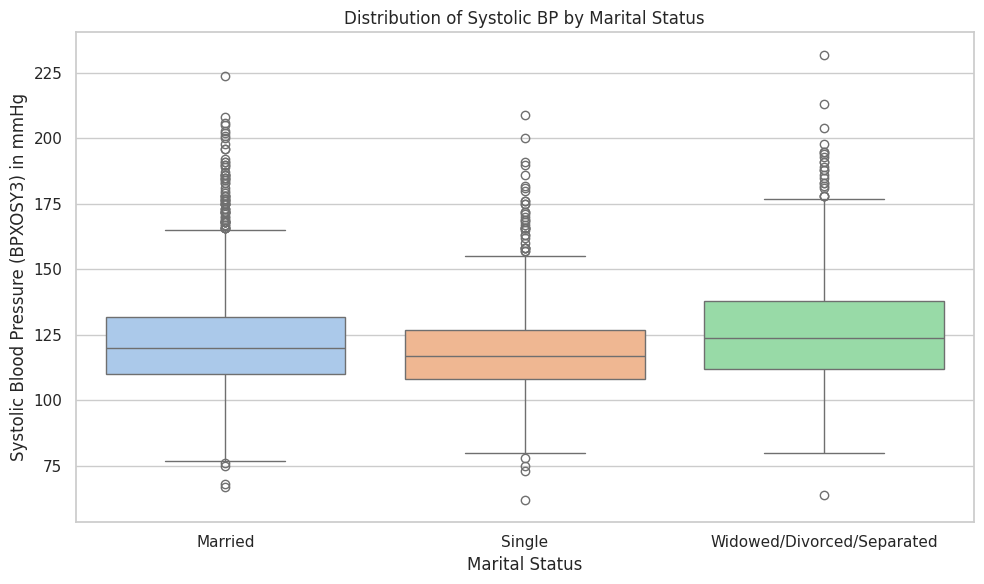

In [ ]:
# Step 8: Visualization by marital status
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(data=filtered, x='MaritalStatus', y='BPXOSY3', hue='MaritalStatus', palette='pastel', dodge=False)
plt.legend([], [], frameon=False)  # Hide legend

plt.xlabel('Marital Status')
plt.ylabel('Systolic Blood Pressure (BPXOSY3) in mmHg')
plt.title('Distribution of Systolic BP by Marital Status')
plt.tight_layout()
plt.show()


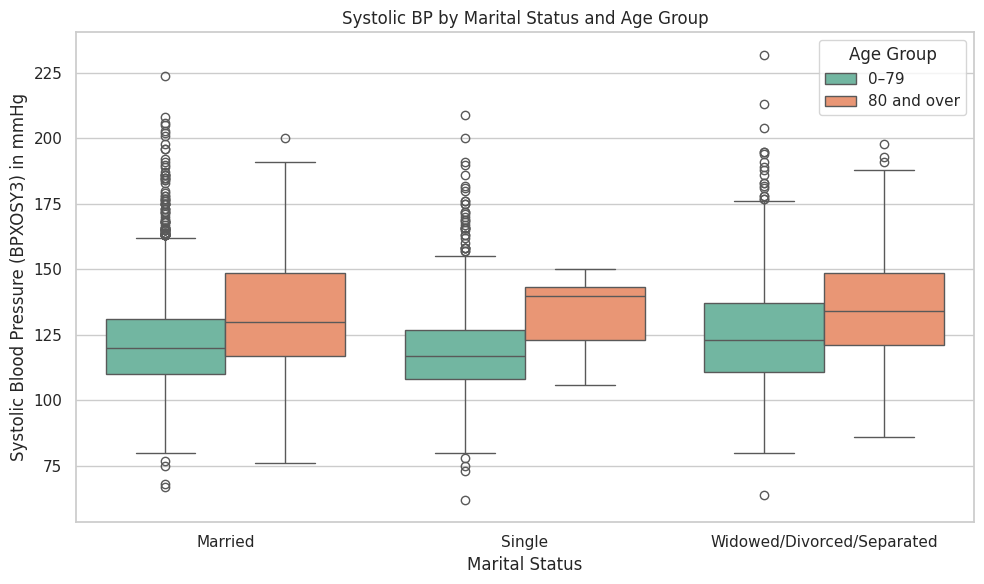

In [ ]:
# Step 9: Visualization by marital status and age group
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered, x='MaritalStatus', y='BPXOSY3', hue='AgeGroup', palette='Set2')
plt.xlabel('Marital Status')
plt.ylabel('Systolic Blood Pressure (BPXOSY3) in mmHg')
plt.title('Systolic BP by Marital Status and Age Group')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

In [ ]:
# Step 10: Age correlation
age_corr = filtered[['RIDAGEYR', 'BPXOSY3']].corr().iloc[0, 1]
print(f"\n📊 Correlation between Age and Systolic BP: {age_corr:.2f}")


📊 Correlation between Age and Systolic BP: 0.36


In [ ]:
## Analysis 4: Correlation for sedentary behavior time (PAD680) by weight categories
# Step 1: Load and merge relevant columns

Analysis4 = pd.merge(
    minbehavior[['SEQN', 'PAD680']],
    weight[['SEQN', 'WHD020']],
    on='SEQN',
    how='inner'
)

# Step 2: Clean data
filtered = (
    Analysis4[['PAD680', 'WHD020']]
    .query("PAD680.notna() and WHD020.notna()")
    .query("PAD680 not in [7777, 9999] and WHD020 not in [7777, 9999]")
)

# Step 3: Calculate Pearson correlation
correlation = filtered[['PAD680', 'WHD020']].corr().iloc[0, 1]
print(f"\n📊 Correlation between sedentary time and weight: {correlation:.2f}")


📊 Correlation between sedentary time and weight: 0.16


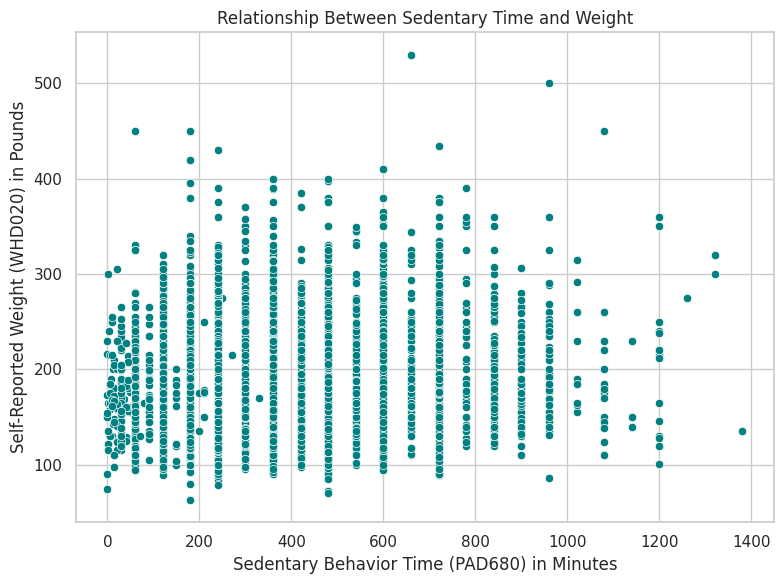

In [ ]:
# Step 4: Visualization
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered, x='PAD680', y='WHD020', color='teal')
plt.xlabel('Sedentary Behavior Time (PAD680) in Minutes')
plt.ylabel('Self-Reported Weight (WHD020) in Pounds')
plt.title('Relationship Between Sedentary Time and Weight')
plt.tight_layout()
plt.show()

In [ ]:
#Analysis 5: Correlation between Marital Status vs Depression (DPQ020)
# Step 1: Load and merge relevant columns
Analysis5 = pd.merge(
    demo[['SEQN', 'DMDMARTZ']],
    mental[['SEQN', 'DPQ020']],
    on='SEQN',
    how='inner'
)

# Step 2: Clean data
filtered = (
    Analysis5[['DMDMARTZ', 'DPQ020']]
    .query("DMDMARTZ.notna() and DPQ020.notna()")
    .query("DMDMARTZ not in [77, 99] and DPQ020 not in [7, 9]")
)

# Step 3: Recode marital status
marital_map = {
    1: 'Married',
    2: 'Widowed/Divorced/Separated',
    3: 'Single'
}
filtered['MaritalStatus'] = filtered['DMDMARTZ'].map(marital_map)

# Step 4: Recode depression frequency
depression_map = {
    0: 'Not at all',
    1: 'Several days',
    2: 'More than half the days',
    3: 'Nearly every day'
}
filtered['DepressionLevel'] = filtered['DPQ020'].map(depression_map)

# Step 5: Create contingency table
contingency = pd.crosstab(filtered['MaritalStatus'], filtered['DepressionLevel'])

# Step 6: Run chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

# Step 7: Output results
print("Contingency Table:\n", contingency)
print(f"\nChi-square statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")

if p < 0.05:
    print("\n✅ Statistically significant association between marital status and depressive symptoms.")
else:
    print("\n❌ No statistically significant association found.")

Contingency Table:
 DepressionLevel             More than half the days  Nearly every day  \
MaritalStatus                                                           
Married                                         103                55   
Single                                           89                68   
Widowed/Divorced/Separated                       79                77   

DepressionLevel             Not at all  Several days  
MaritalStatus                                         
Married                           2088           597  
Single                             609           327  
Widowed/Divorced/Separated         848           318  

Chi-square statistic: 157.03
P-value: 0.0000
Degrees of freedom: 6

✅ Statistically significant association between marital status and depressive symptoms.


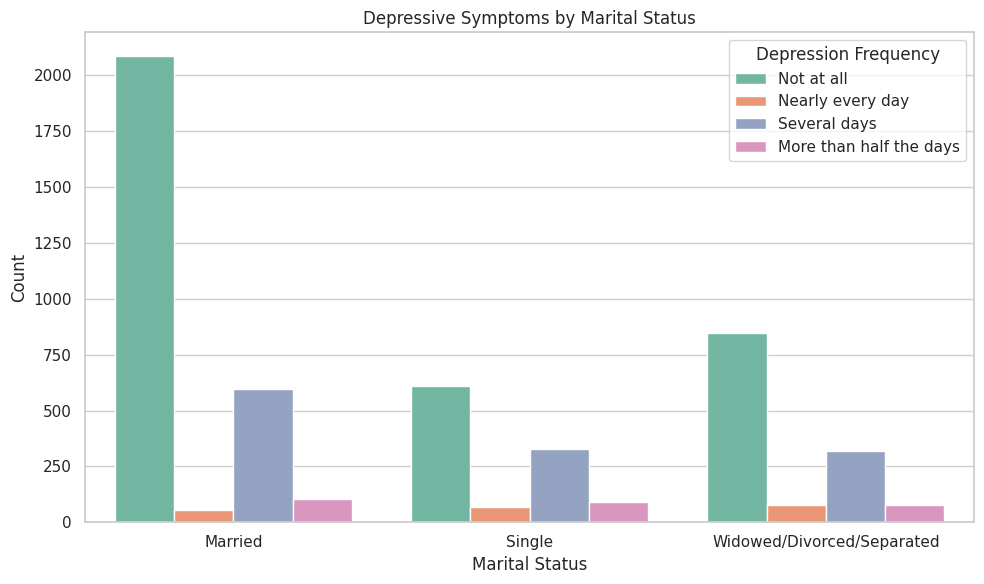

In [ ]:
# Step 8: Visualization
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered, x='MaritalStatus', hue='DepressionLevel', palette='Set2')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Depressive Symptoms by Marital Status')
plt.legend(title='Depression Frequency')
plt.tight_layout()
plt.show()

In [ ]:
### OPTION 3 - Use R Program for Data Analysis

In [ ]:
install.packages("haven")       # Equivalent to pyreadstat
install.packages("tidyverse")   # Includes ggplot2, dplyr, readr, etc. (covers pandas/seaborn functionality)
install.packages("httr")        # Equivalent to requests
install.packages("ggplot2")     # For data visualization (like seaborn/matplotlib)
install.packages("pracma")      # For numerical methods and scientific computing

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Load required libraries
library(haven)
library(dplyr)
library(stats)
library(ggplot2)

In [ ]:
# Use data directly from weblinks
demo = read_xpt("https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/DEMO_L.xpt")
bp = read_xpt("https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/BPXO_L.xpt")
vitd = read_xpt("https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/VID_L.xpt")
hepb = read_xpt("https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/HEPB_S_L.xpt")
kidney = read_xpt("https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/KIQ_U_L.xpt")
minbehavior = read_xpt("https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/PAQ_L.xpt")
weight = read_xpt("https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/WHQ_L.xpt")
mental = read_xpt("https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/DPQ_L.xpt")

In [ ]:
# Step 1: Filter and select relevant columns
Analysis1 <- demo %>%
  select(DMDMARTZ, DMDEDUC2) %>%
  filter(!is.na(DMDMARTZ), !is.na(DMDEDUC2)) %>%
  filter(!(DMDMARTZ %in% c(77, 99)), !(DMDEDUC2 %in% c(7, 9)))

# Step 2: Recode categories
Analysis1 <- Analysis1 %>%
  mutate(
    MaritalStatus = case_when(
      DMDMARTZ == 1 ~ "Married",
      DMDMARTZ == 2 ~ "Widowed/Divorced/Separated",
      DMDMARTZ == 3 ~ "Single",
      TRUE ~ NA_character_
    ),
    EducLevel = ifelse(DMDEDUC2 == 5, "Bachelor or Higher", "Less than Bachelor")
  )

# Step 3: Drop rows with missing recodes
filtered <- Analysis1 %>%
  select(MaritalStatus, EducLevel) %>%
  filter(!is.na(MaritalStatus), !is.na(EducLevel))

# Step 4: Contingency table and chi-square test
contingency_table <- table(filtered$MaritalStatus, filtered$EducLevel)
chi_result <- chisq.test(contingency_table)

# Step 5: Output results
print("Contingency Table:")
print(contingency_table)

cat("\nChi-square Statistic:", round(chi_result$statistic, 2))
cat("\nDegrees of Freedom:", chi_result$parameter)
cat("\nP-value:", round(chi_result$p.value, 4))

# Interpretation
if (chi_result$p.value < 0.05) {
  cat("\n\n✅ Statistically significant association between marital status and education level.\n")
} else {
  cat("\n\n❌ No statistically significant association found.\n")
}

[1] "Contingency Table:"
                            
                             Bachelor or Higher Less than Bachelor
  Married                                  1631               2503
  Single                                    517               1106
  Widowed/Divorced/Separated                473               1542

Chi-square Statistic: 157.97
Degrees of Freedom: 2
P-value: 0

✅ Statistically significant association between marital status and education level.


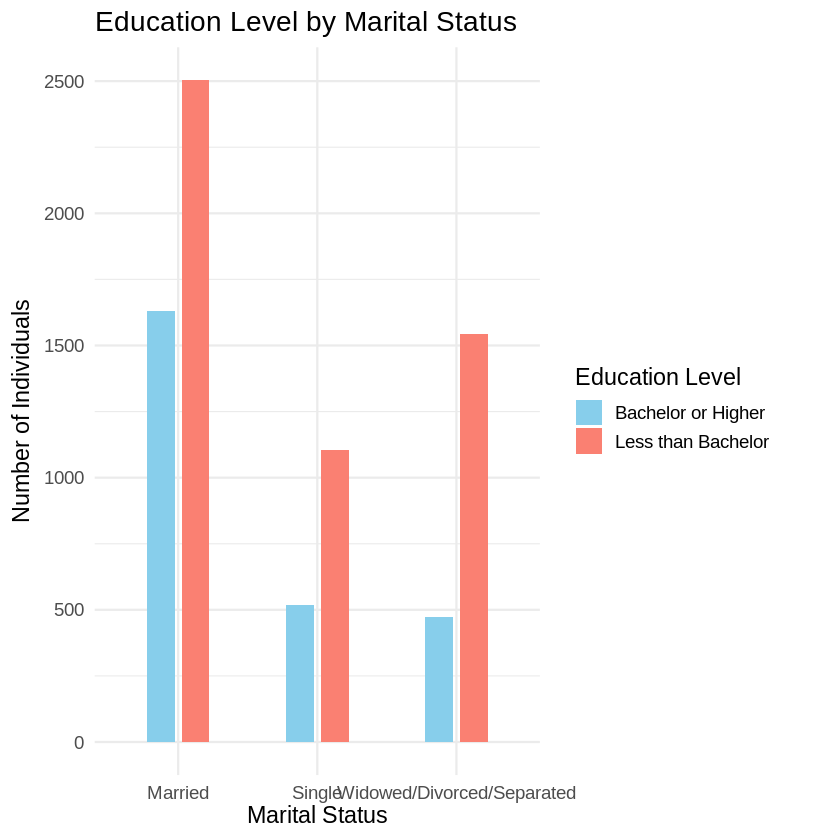

In [ ]:
# Visualization Analysis 1

# Convert contingency table to data frame
plot_data <- as.data.frame(contingency_table) %>%
  rename(MaritalStatus = Var1, EducLevel = Var2, Count = Freq)

# Create grouped bar plot with more spacing
ggplot(plot_data, aes(x = MaritalStatus, y = Count, fill = EducLevel)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.5), width = 0.4) +
  # manually changing bar color
  scale_fill_manual(values = c("Bachelor or Higher" = "skyblue", "Less than Bachelor" = "salmon")) +
  labs(
    title = "Education Level by Marital Status",
    x = "Marital Status",
    y = "Number of Individuals",
    fill = "Education Level"
  ) +
  theme_minimal(base_size = 14)

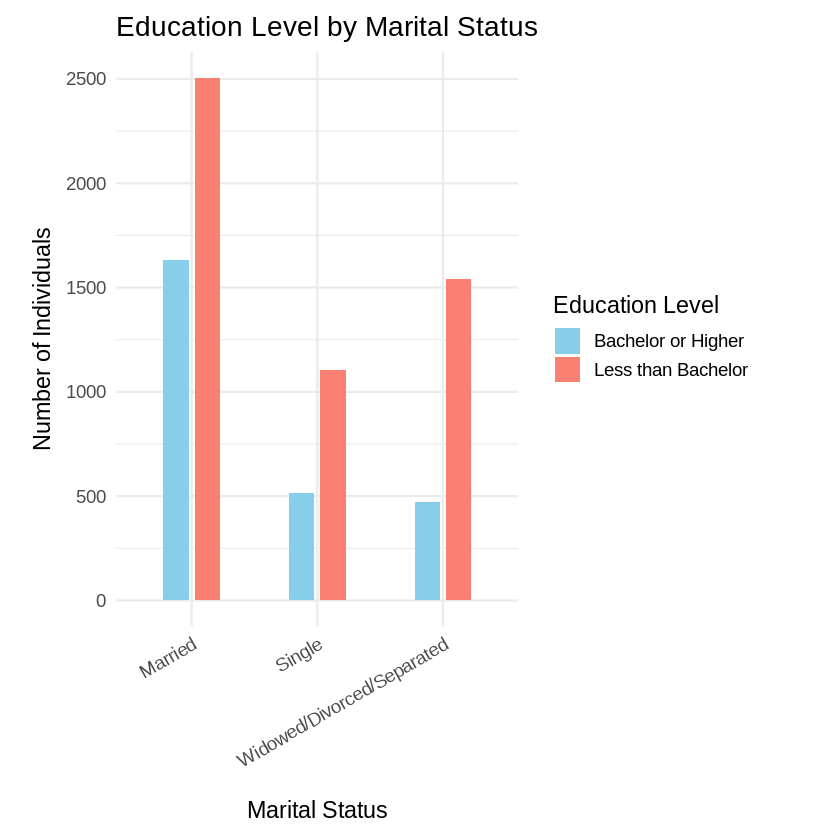

In [ ]:
#Fixing With

# Convert contingency table to data frame
plot_data <- as.data.frame(contingency_table) %>%
  rename(MaritalStatus = Var1, EducLevel = Var2, Count = Freq)

# Create grouped bar plot with more spacing
ggplot(plot_data, aes(x = MaritalStatus, y = Count, fill = EducLevel)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.5), width = 0.4) +
# manually changing bar color
scale_fill_manual(values = c("Bachelor or Higher" = "skyblue", "Less than Bachelor" = "salmon")) +
  labs(
    title = "Education Level by Marital Status",
    x = "Marital Status",
    y = "Number of Individuals",
    fill = "Education Level"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(angle = 30, hjust = 1),
    plot.margin = margin(10, 20, 10, 20)
  )

In [ ]:
## Analysis 2: One-Way ANOVA (Analysis of Variance) between marital status and sedientary behavior time (PAD680)

# Step 1: Merge and clean
Analysis2 <- demo %>%
  select(SEQN, DMDMARTZ) %>%
  inner_join(minbehavior %>% select(SEQN, PAD680), by = "SEQN") %>%
  filter(
    !is.na(DMDMARTZ), !is.na(PAD680),
    !(DMDMARTZ %in% c(77, 99)),
    !(PAD680 %in% c(7777, 9999))
  )

# Step 2: Recode marital status
Analysis2 <- Analysis2 %>%
  mutate(
    MaritalStatus = case_when(
      DMDMARTZ == 1 ~ "Married",
      DMDMARTZ == 2 ~ "Widowed/Divorced/Separated",
      DMDMARTZ == 3 ~ "Single",
      TRUE ~ NA_character_
    )
  ) %>%
  filter(!is.na(MaritalStatus))

# Step 3: Run one-way ANOVA
anova_result <- aov(PAD680 ~ MaritalStatus, data = Analysis2)
summary_result <- summary(anova_result)

# Step 4: Output group means
group_means <- Analysis2 %>%
  group_by(MaritalStatus) %>%
  summarise(MeanPAD680 = mean(PAD680, na.rm = TRUE))

print(group_means)

# Step 5: Output ANOVA results
print(summary_result)

# Step 6: Interpretation
p_value <- summary_result[[1]]$`Pr(>F)`[1]

if (!is.na(p_value) && length(p_value) == 1 && p_value < 0.05) {
  cat("\n✅ Statistically significant difference in mean sedentary behavior time across marital status groups.\n")
} else {
  cat("\n❌ No statistically significant difference found.\n")
}

# A tibble: 3 × 2
  MaritalStatus              MeanPAD680
  <chr>                           <dbl>
1 Married                          353.
2 Single                           382.
3 Widowed/Divorced/Separated       363.
                Df    Sum Sq Mean Sq F value   Pr(>F)    
MaritalStatus    2    989521  494760   11.09 1.56e-05 ***
Residuals     7706 343916706   44630                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

✅ Statistically significant difference in mean sedentary behavior time across marital status groups.


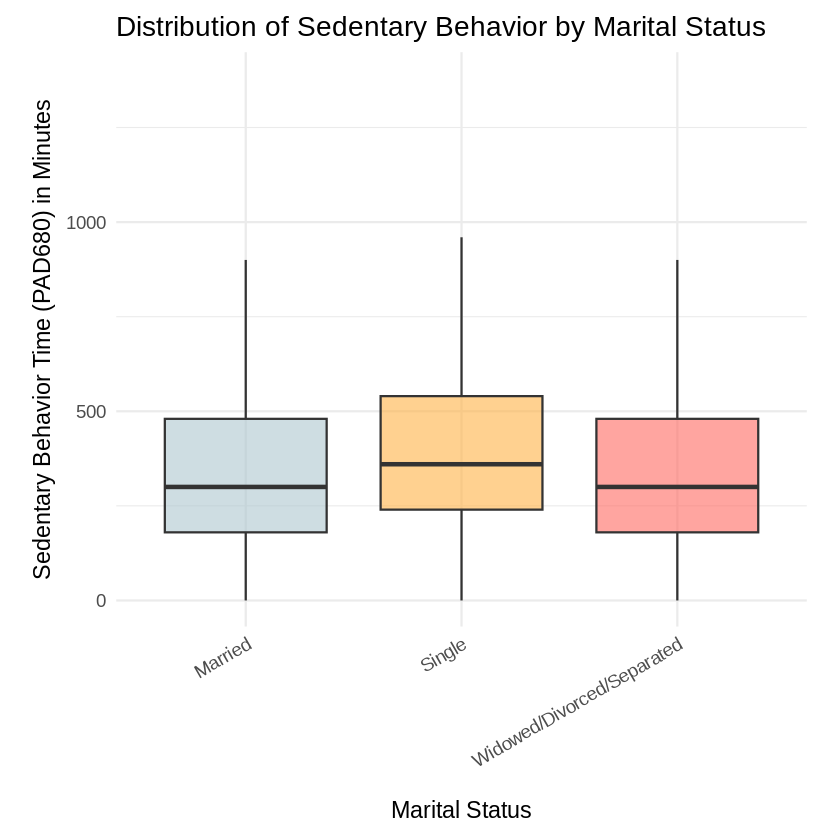

In [ ]:
# Visualization Analysis 2
# Create boxplot
ggplot(Analysis2, aes(x = MaritalStatus, y = PAD680, fill = MaritalStatus)) +
  geom_boxplot(outlier.shape = NA, alpha = 0.6) +
# manually changing bar color
scale_fill_manual(values = c(
    "Married" = "#AEC6CF",  # pastel blue
    "Single" = "#FFB347",   # pastel orange
    "Widowed/Divorced/Separated" = "#FF6961"  # pastel red
  )) +
  labs(
    title = "Distribution of Sedentary Behavior by Marital Status",
    x = "Marital Status",
    y = "Sedentary Behavior Time (PAD680) in Minutes"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    legend.position = "none",  # Hide legend
    axis.text.x = element_text(angle = 30, hjust = 1),
    plot.margin = margin(10, 20, 10, 20)
  )

In [ ]:
## Analysis 3: One-way ANOVA for systolic blood pressure (BPXOSY3) by marital status and age correlation

# Step 1: Merge and clean
Analysis3 <- demo %>%
  select(SEQN, RIDAGEYR, DMDMARTZ) %>%
  inner_join(bp %>% select(SEQN, BPXOSY3), by = "SEQN") %>%
  filter(
    !is.na(RIDAGEYR), !is.na(DMDMARTZ), !is.na(BPXOSY3),
    !(DMDMARTZ %in% c(77, 99))
  )

# Step 2: Recode marital status
Analysis3 <- Analysis3 %>%
  mutate(
    MaritalStatus = case_when(
      DMDMARTZ == 1 ~ "Married",
      DMDMARTZ == 2 ~ "Widowed/Divorced/Separated",
      DMDMARTZ == 3 ~ "Single",
      TRUE ~ NA_character_
    ),
    AgeGroup = ifelse(RIDAGEYR >= 80, "80 and over", "0–79")
  ) %>%
  filter(!is.na(MaritalStatus))

# Step 3: Run one-way ANOVA
anova_result <- aov(BPXOSY3 ~ MaritalStatus, data = Analysis3)
summary_result <- summary(anova_result)

# Step 4: Output group means
group_means <- Analysis3 %>%
  group_by(MaritalStatus) %>%
  summarise(MeanBPXOSY3 = mean(BPXOSY3, na.rm = TRUE))

print(group_means)

# Step 5: Output ANOVA results
print(summary_result)

# Step 6: Interpretation
p_value <- summary_result[[1]]$`Pr(>F)`[1]

if (!is.na(p_value) && length(p_value) == 1 && p_value < 0.05) {
  cat("\n✅ Statistically significant difference in systolic blood pressure across marital status groups.\n")
} else {
  cat("\n❌ No statistically significant difference found.\n")
}

# A tibble: 3 × 2
  MaritalStatus              MeanBPXOSY3
  <chr>                            <dbl>
1 Married                           123.
2 Single                            119.
3 Widowed/Divorced/Separated        126.
                Df  Sum Sq Mean Sq F value Pr(>F)    
MaritalStatus    2   34991   17495   52.74 <2e-16 ***
Residuals     5835 1935707     332                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

✅ Statistically significant difference in systolic blood pressure across marital status groups.


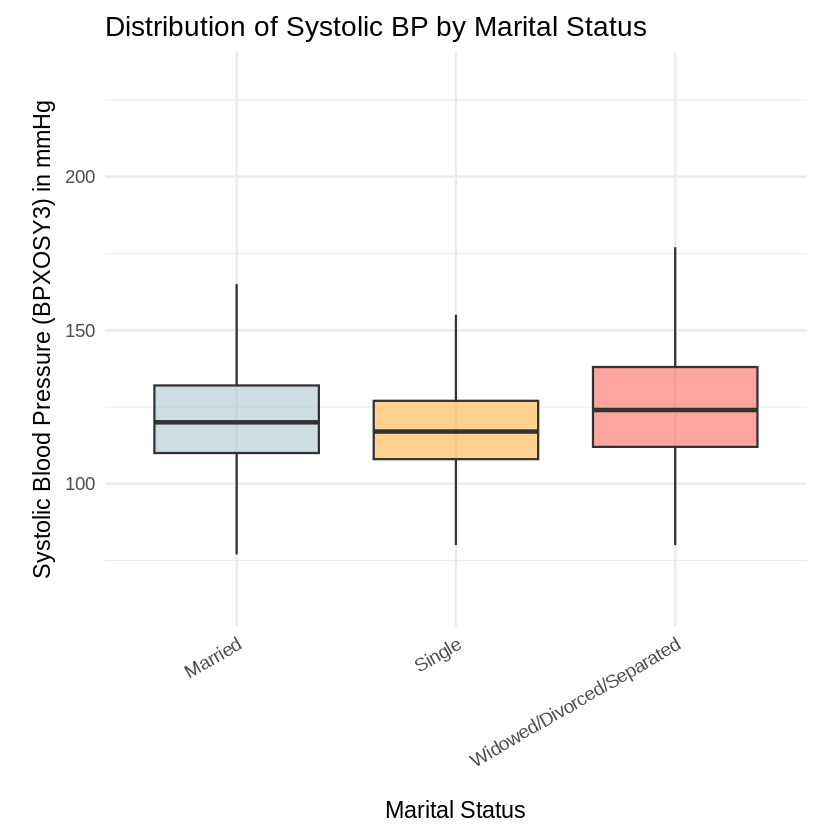

In [ ]:
# Visualization Analysis 3 by Marital Status

# Create boxplot
ggplot(Analysis3, aes(x = MaritalStatus, y = BPXOSY3, fill = MaritalStatus)) +
  geom_boxplot(outlier.shape = NA, alpha = 0.6) +
# manually changing bar color
scale_fill_manual(values = c(
    "Married" = "#AEC6CF",  # pastel blue
    "Single" = "#FFB347",   # pastel orange
    "Widowed/Divorced/Separated" = "#FF6961"  # pastel red
  )) +
  labs(
    title = "Distribution of Systolic BP by Marital Status",
    x = "Marital Status",
    y = "Systolic Blood Pressure (BPXOSY3) in mmHg"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    legend.position = "none",  # Hide legend
    axis.text.x = element_text(angle = 30, hjust = 1),
    plot.margin = margin(10, 20, 10, 20)
  )

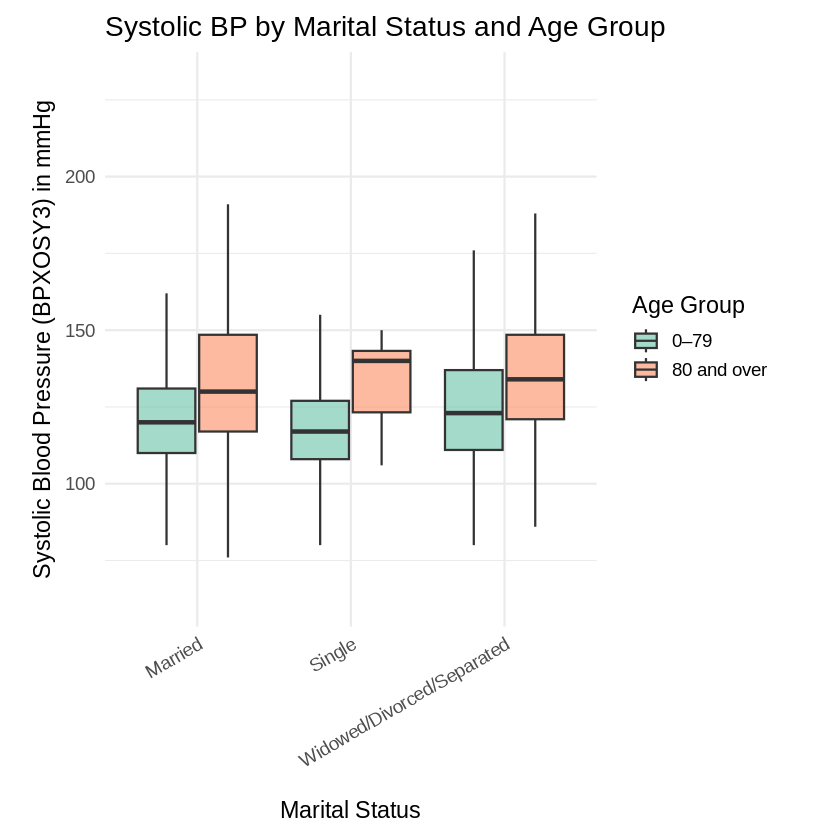

In [ ]:
# Visualization Analysis 3 BP(systolic) by Marital Status and Age group
# Create boxplot with hue = AgeGroup
ggplot(Analysis3, aes(x = MaritalStatus, y = BPXOSY3, fill = AgeGroup)) +
  geom_boxplot(outlier.shape = NA, alpha = 0.6, position = position_dodge(width = 0.8)) +
# autoselect bar color using palette sets
scale_fill_brewer(palette = "Set2") +
  labs(
    title = "Systolic BP by Marital Status and Age Group",
    x = "Marital Status",
    y = "Systolic Blood Pressure (BPXOSY3) in mmHg",
    fill = "Age Group"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(angle = 30, hjust = 1),
    plot.margin = margin(10, 20, 10, 20)
  )

In [ ]:
# Analysis 3, Age correlation
age_corr <- cor(Analysis3$RIDAGEYR, Analysis3$BPXOSY3, use = "complete.obs", method = "pearson")

# Print result
cat(sprintf("\n📊 Correlation between Age and Systolic BP: %.2f\n", age_corr))


📊 Correlation between Age and Systolic BP: 0.36


In [ ]:
## Analysis 4: Correlation for sedentary behavior time (PAD680) by weight categories

# Step 1: Load and merge relevant columns
Analysis4 <- minbehavior %>%
  select(SEQN, PAD680) %>%
  inner_join(weight %>% select(SEQN, WHD020), by = "SEQN")

# Step 2: Clean data
filtered <- Analysis4 %>%
  filter(
    !is.na(PAD680), !is.na(WHD020),
    !(PAD680 %in% c(7777, 9999)),
    !(WHD020 %in% c(7777, 9999))
  )

# Step 3: Calculate Pearson correlation
correlation <- cor(filtered$PAD680, filtered$WHD020, use = "complete.obs", method = "pearson")

# Step 4: Print result
cat(sprintf("\n📊 Correlation between sedentary time and weight: %.2f\n", correlation))


📊 Correlation between sedentary time and weight: 0.16


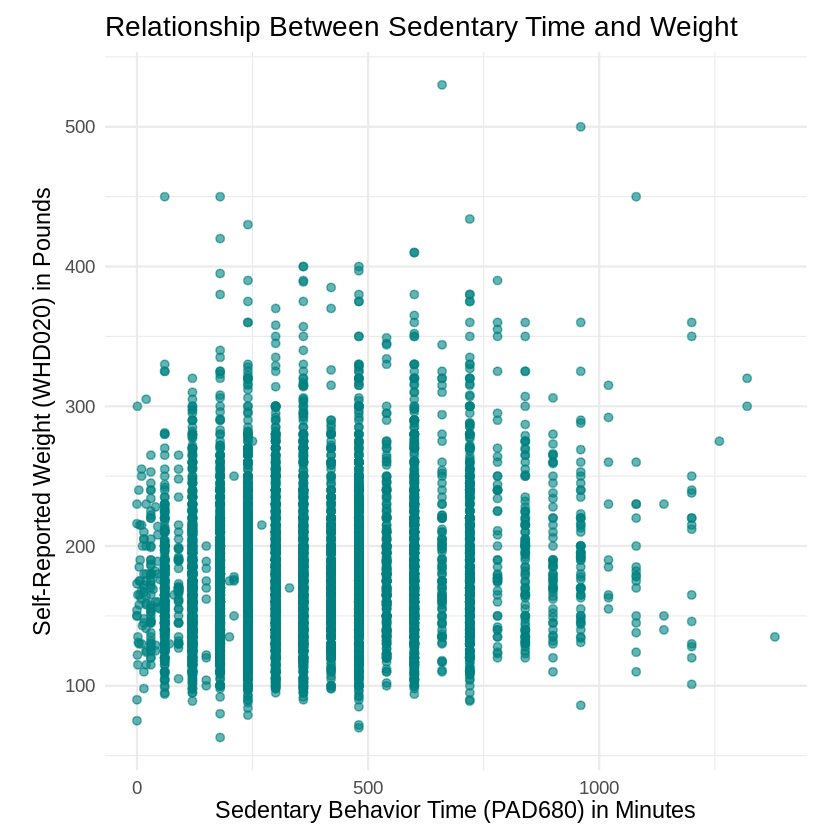

In [ ]:
# Visualization Analysis 4
# Create scatterplot
ggplot(filtered, aes(x = PAD680, y = WHD020)) +
  geom_point(color = "#008080", alpha = 0.6) +
  labs(
    title = "Relationship Between Sedentary Time and Weight",
    x = "Sedentary Behavior Time (PAD680) in Minutes",
    y = "Self-Reported Weight (WHD020) in Pounds"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.margin = margin(10, 20, 10, 20)
  )

In [ ]:
#Analysis 5: Correlation between Marital Status vs Depression (DPQ020)
# Step 1: Merge relevant columns
Analysis5 <- demo %>%
  select(SEQN, DMDMARTZ) %>%
  inner_join(mental %>% select(SEQN, DPQ020), by = "SEQN")

# Step 2: Clean data
filtered <- Analysis5 %>%
  filter(
    !is.na(DMDMARTZ), !is.na(DPQ020),
    !(DMDMARTZ %in% c(77, 99)),
    !(DPQ020 %in% c(7, 9))
  )

# Step 3: Recode marital status
filtered <- filtered %>%
  mutate(
    MaritalStatus = case_when(
      DMDMARTZ == 1 ~ "Married",
      DMDMARTZ == 2 ~ "Widowed/Divorced/Separated",
      DMDMARTZ == 3 ~ "Single",
      TRUE ~ NA_character_
    )
  )

# Step 4: Recode depression frequency
filtered <- filtered %>%
  mutate(
    DepressionLevel = case_when(
      DPQ020 == 0 ~ "Not at all",
      DPQ020 == 1 ~ "Several days",
      DPQ020 == 2 ~ "More than half the days",
      DPQ020 == 3 ~ "Nearly every day",
      TRUE ~ NA_character_
    )
  ) %>%
  filter(!is.na(MaritalStatus), !is.na(DepressionLevel))

# Step 5: Create contingency table
contingency <- table(filtered$MaritalStatus, filtered$DepressionLevel)

# Step 6: Run chi-square test
chi_result <- chisq.test(contingency)

# Step 7: Output results
cat("Contingency Table:\n")
print(contingency)

cat(sprintf("\nChi-square statistic: %.2f\n", chi_result$statistic))
cat(sprintf("P-value: %.4f\n", chi_result$p.value))
cat(sprintf("Degrees of freedom: %d\n", chi_result$parameter))

if (!is.na(chi_result$p.value) && chi_result$p.value < 0.05) {
  cat("\n✅ Statistically significant association between marital status and depressive symptoms.\n")
} else {
  cat("\n❌ No statistically significant association found.\n")
}

Contingency Table:
                            
                             More than half the days Nearly every day
  Married                                        103               55
  Single                                          89               68
  Widowed/Divorced/Separated                      79               77
                            
                             Not at all Several days
  Married                          2088          597
  Single                            609          327
  Widowed/Divorced/Separated        848          318

Chi-square statistic: 157.03
P-value: 0.0000
Degrees of freedom: 6

✅ Statistically significant association between marital status and depressive symptoms.


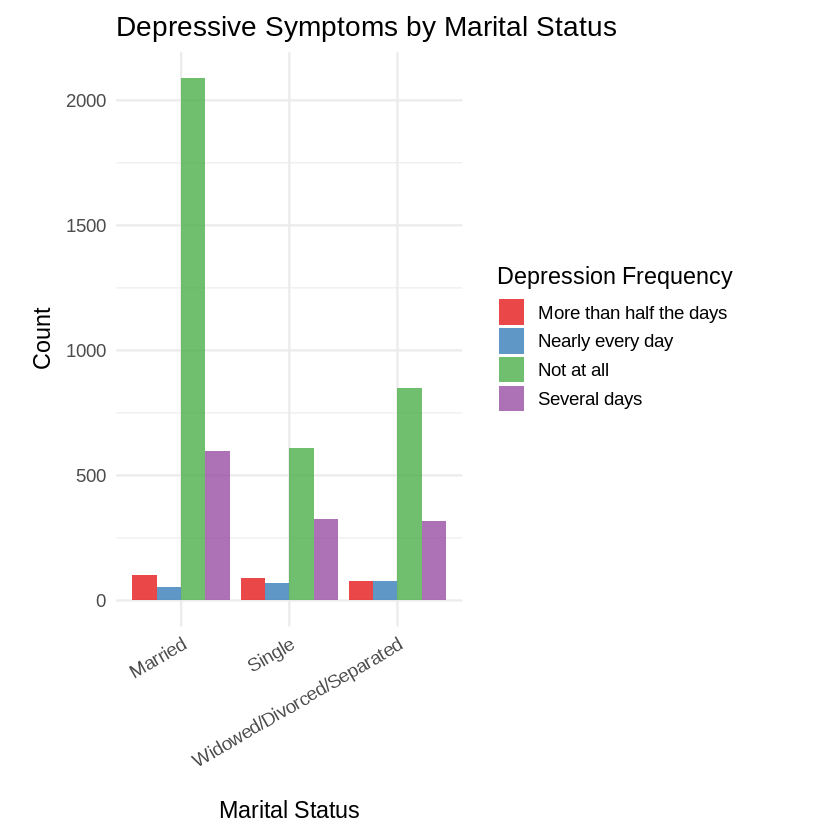

In [ ]:
#Visualization Analysis 5

ggplot(filtered, aes(x = MaritalStatus, fill = DepressionLevel)) +
  geom_bar(position = "dodge", alpha = 0.8) +
# autoselect bar color using palette sets
scale_fill_brewer(palette = "Set1") +
  labs(
    title = "Depressive Symptoms by Marital Status",
    x = "Marital Status",
    y = "Count",
    fill = "Depression Frequency"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(angle = 30, hjust = 1),
    plot.margin = margin(10, 20, 10, 20)
  )
